Aproximation: see https://arxiv.org/abs/2311.17987

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

#latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

\begin{equation}
\label{eq:RelicAbundance}
\Omega_{\chi} h^{2} \approx \frac{2.08 \times 10^{9}\, x_{f}\,\,\text{GeV}^{-1}}{M_{\mathrm{Pl}} \sqrt{g_{*}(T_f)}\left(a+3 b / x_{f}\right)}\,,
\end{equation}

\begin{equation}
\label{eq:sigmav}
\langle\sigma{v}\rangle\approx a=\frac{g^4_D\, B^2}{16\pi m_{\Psi_1}^2}\frac{(1-r^2)^{\frac{3}{2}}}{(1-r^2/2)^2}\,,
\end{equation}

$r=\frac{m_{Z'}}{m_{\Psi_1}}<1$

In [2]:
#Experimental values for DM:Planck results 2018
e = 10
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.108 0.12 0.132


General case: This is the gD vs m that reproduce the DM relic density

In [75]:
def gD(B,xf,gs,m,r):
    MPl=1.22e19
    gd = (2.08e9*xf*16.*np.pi*m**2*(1.-r**2/2)**(2)/(MPl*np.sqrt(gs)*B**2*0.12))**(1/4)
    return gd

In [76]:
gD(B=1,xf=25,gs=80,m=3000)

1.1577303261259642

In [77]:
n=np.arange(1,1000,3)

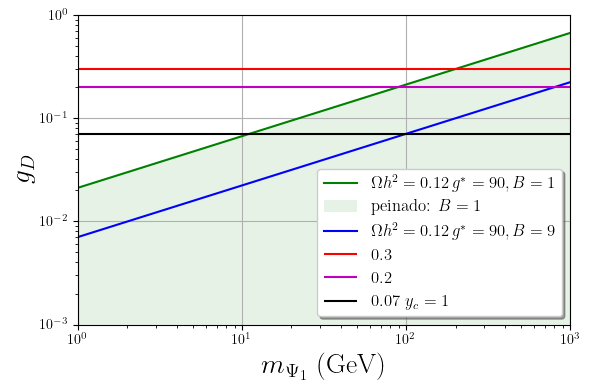

In [81]:
plt.figure(figsize=(6,4))

plt.loglog(n, gD(B=1,xf=25,gs=80,m=n),'g-',label=r'$\Omega h^2=0.12\, g^*=90, B=1$')
plt.fill_between(n,1.e-3,gD(1,25,90,n),facecolor='green',alpha=0.1,label='peinado: $B=1$')

plt.loglog(n, gD(B=9,xf=25,gs=80,m=n),'b-',label=r'$\Omega h^2=0.12\, g^*=90, B=9$')

plt.hlines(0.3,1,1e3, 'r',label=r'0.3')
plt.hlines(0.2,1,1e3, 'm',label=r'0.2')
plt.hlines(0.07,1,1e3, 'k',label=r'$0.07\,\, y_c=1$')

plt.xlabel(r'$m_{\Psi_1}$ (GeV)',size=20)
plt.ylabel(r'$g_D$',size=20)
plt.legend(prop={'size':12},shadow=True,loc='lower right')
plt.grid()

plt.ylim(1e-3,1)
plt.xlim(1, 1e3)
plt.tight_layout()